In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use(["science", "notebook", "grid"])
from matplotlib.animation import FuncAnimation

In [2]:
points = np.random.uniform(-5, 5, (10000, 2))
initial_pts = np.random.uniform(-5, 5, (3, 2))

In [49]:
class KMeans:
    def __init__(self, points, k, iters) -> None:
        self.x_limits = [np.min(points[:, 0]) - 0.2, np.max(points[:, 0]) + 0.2]
        self.y_limits = [np.min(points[:, 1]) - 0.2, np.max(points[:, 1]) + 0.2]
        self.points = points 
        self.k = k
        self.iters = iters
        self.current_iter = 0
        self.cluster_centres = np.random.uniform(self.x_limits[0], self.x_limits[1], (self.k, 2))
        self.calculate_distances()
        self.get_labels()

    def calculate_distances(self):
        distances = []
        for i in range(self.k):
            distances.append(np.linalg.norm(self.points - self.cluster_centres[i], axis=1))
        self.distances = np.array(distances)
        return self.distances
    
    def get_labels(self):
        self.labels = np.argmin(self.distances, axis=0)
        return self.labels
    
    def update_cluster_centres(self, labels):
        cluster_centers = []
        unique_labels = np.unique(labels)
        for label in unique_labels:
            cluster_centers.append(self.points[labels == label].mean(axis=0))
        self.cluster_centres = np.array(cluster_centers)
        return self.cluster_centres
    
    def update(self):
        self.calculate_distances()
        self.get_labels()
        self.update_cluster_centres(self.labels)
        self.current_iter += 1

    def StoppingConditionMet(self, prev_distance, new_distance) -> bool:
        if (np.abs(prev_distance - new_distance) < 1e-3).sum() >= 0.9 * len(self.points):
            return True
        else:
            return False

    def plot(self, ax):
        ax.scatter(self.points[:, 0], self.points[:, 1], c=self.labels, cmap="Set3", s = 50, alpha = 0.5, marker = "x")
        ax.scatter(self.cluster_centres[:, 0], self.cluster_centres[:, 1], c=np.unique(self.labels), marker="p", s=150, 
                   edgecolor = "black", linewidth = 2, cmap="Dark2")
        ax.set_xlim(self.x_limits)
        ax.set_ylim(self.y_limits)
        ax.set_xlabel("Feature 1", fontsize = 15, fontweight = "bold")
        ax.set_ylabel("Feature 2", fontsize = 15, fontweight = "bold")
        ax.set_title(f"Iteration {self.current_iter}", fontsize = 15, fontweight = "bold")

    def make_animation(self):
        fig, ax = plt.subplots(figsize = (10, 6))
        ax.plot()
        points_line = ax.scatter([], [], c=[], cmap="Set3", s = 50, alpha = 0.5, marker = "x")
        cluster_line = ax.scatter([], [], c=[], cmap="Set3", s = 150, alpha = 1, marker = "p", edgecolor = "black", linewidth = 2)
        ax.set_xlim(self.x_limits)
        ax.set_ylim(self.y_limits)
        def animate(i):
            print(self.current_iter)
            points_line.set_offsets(self.points)
            points_line.set_array(self.labels)
            cluster_line.set_offsets(self.cluster_centres)
            cluster_line.set_array(np.unique(self.labels))
            ax.set_title(f"KMeans Clustering \nIteration {self.current_iter}", fontsize = 15, fontweight = "bold")
            self.update()
            return points_line, cluster_line
        anim = FuncAnimation(fig, animate, frames = self.iters, interval = 500, blit = True)
        anim.save("kmeans.gif", writer = "imagemagick")
        return

In [50]:
kmean = KMeans(points, 5, 20)

MovieWriter imagemagick unavailable; using Pillow instead.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


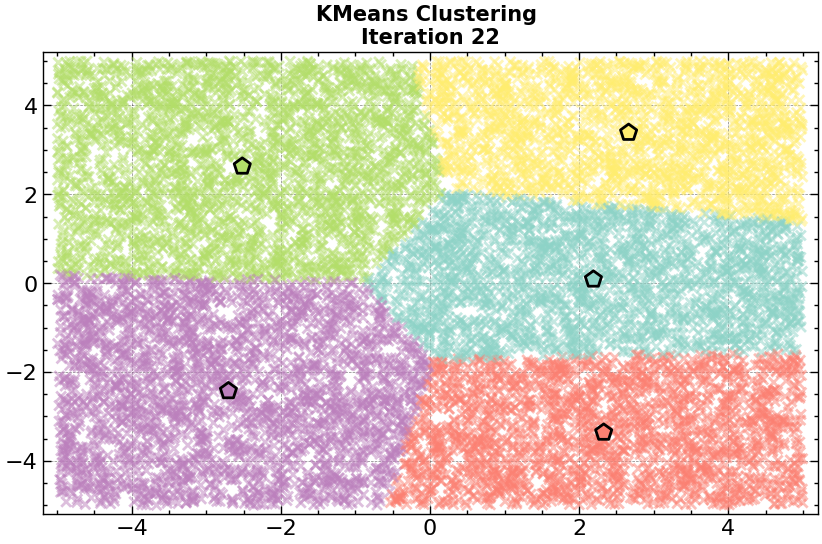

In [51]:
kmean.make_animation()